In [ ]:
Transform and save Eurac Research Sentinel SCA images

In [2]:
import rioxarray as rxr
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import CRS

Do you want to plot the image into a Region of Interest (if yes, type 'y'):  y
Please insert the minimum latitude (in decimal degrees):  44
Please insert the maximum latitude (in decimal degrees):  46
Please insert the minimum longitude (in decimal degrees):  6
Please insert the maximum longitude (in decimal degrees):  9


Saving the SCA map as 'EURAC_SENTINEL_SCA.nc'


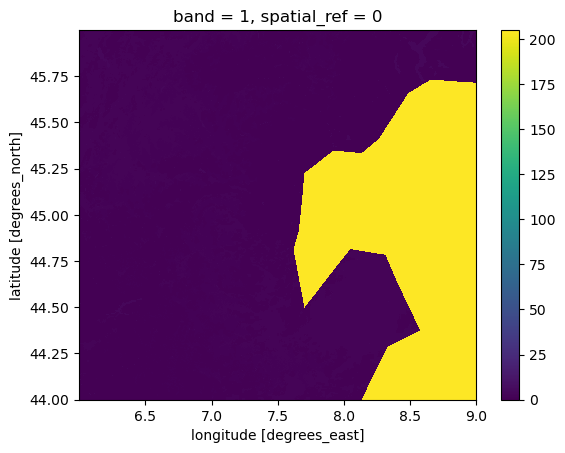

In [10]:
# Open .tiff image
da_path = '/home/federico/Jupyter_Notebooks/Eurac_Sentinel_SCA_sample/eo4alps_s1s2modisSnow_20181101.tif'
da = rxr.open_rasterio(da_path)

# Transform coordinates in the World Geodetic System (WGS-84; EPSG:4326)
da = da.rio.reproject(CRS("WGS84"), nodata=205)

# Cut image over a selected area if requested by the user
roi = input("Do you want to plot the image into a Region of Interest (if yes, type 'y'): ")

if roi == 'y':
    lat_min = float(input("Please insert the minimum latitude (in decimal degrees): "))
    lat_max = float(input("Please insert the maximum latitude (in decimal degrees): "))
    lon_min = float(input("Please insert the minimum longitude (in decimal degrees): "))
    lon_max = float(input("Please insert the maximum longitude (in decimal degrees): "))
    da = da.where((da.x <= lon_max) & (da.x >= lon_min) & (da.y <= lat_max) & (da.y >= lat_min), drop=True)

    # Plot the image in the selected area
    plt.figure()
    da.plot()

# Save the final SCA map
save_name = 'EURAC_SENTINEL_SCA.nc'
print(f"Saving the SCA map as '{save_name}'")
da.to_netcdf(save_name, engine="netcdf4")